In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json

In [79]:
# Load CSVs
day_0_trades = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/trades_round_5_day_2.csv", delimiter=";")
day_1_trades = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/trades_round_5_day_3.csv", delimiter=";")
day_2_trades = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/trades_round_5_day_4.csv", delimiter=";")

day_0_prices = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/prices_round_5_day_2.csv", delimiter=";")
day_1_prices = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/prices_round_5_day_3.csv", delimiter=";")
day_2_prices = pd.read_csv("../prosperity-3-backtester/prosperity3bt/resources/round5/prices_round_5_day_4.csv", delimiter=";")

day_0_prices.head

<bound method NDFrame.head of         day  timestamp                     product  bid_price_1  bid_volume_1  \
0         2          0              PICNIC_BASKET2      30094.0          11.0   
1         2          0  VOLCANIC_ROCK_VOUCHER_9750        469.0          11.0   
2         2          0            RAINFOREST_RESIN       9992.0          35.0   
3         2          0  VOLCANIC_ROCK_VOUCHER_9500        718.0          11.0   
4         2          0               VOLCANIC_ROCK      10218.0         150.0   
...     ...        ...                         ...          ...           ...   
149995    2     999900  VOLCANIC_ROCK_VOUCHER_9750        417.0          20.0   
149996    2     999900              PICNIC_BASKET1      58422.0           1.0   
149997    2     999900                  CROISSANTS       4241.0         143.0   
149998    2     999900        MAGNIFICENT_MACARONS        665.0          18.0   
149999    2     999900  VOLCANIC_ROCK_VOUCHER_9500        666.0          20.0  

In [14]:
day_trades = {
    0: day_0_trades,
    1: day_1_trades,
    2: day_2_trades
}

day_prices = {
    0: day_0_prices,
    1: day_1_prices,
    2: day_2_prices
}
day = 2

In [15]:
df = day_trades[day][day_trades[day]["symbol"] == "JAMS"]

print("Unique participants in the market")

print("Buyers: ", df["buyer"].unique())
print("Sellers: ", df["seller"].unique())

df.head

Unique participants in the market
Buyers:  ['Caesar' 'Paris' 'Camilla']
Sellers:  ['Paris' 'Camilla' 'Caesar']


<bound method NDFrame.head of        timestamp   buyer   seller symbol   currency   price  quantity
0              0  Caesar    Paris   JAMS  SEASHELLS  6446.0        10
2            200  Caesar    Paris   JAMS  SEASHELLS  6445.0         5
18          1000  Caesar    Paris   JAMS  SEASHELLS  6446.0         9
25          1300  Caesar  Camilla   JAMS  SEASHELLS  6447.0        12
78          4500  Caesar  Camilla   JAMS  SEASHELLS  6450.0         9
...          ...     ...      ...    ...        ...     ...       ...
17297     996500  Caesar  Camilla   JAMS  SEASHELLS  6518.0         4
17304     997000   Paris   Caesar   JAMS  SEASHELLS  6522.0        10
17311     997800   Paris   Caesar   JAMS  SEASHELLS  6510.0        10
17322     998400  Caesar  Camilla   JAMS  SEASHELLS  6504.0         7
17326     998700  Caesar  Camilla   JAMS  SEASHELLS  6503.0        11

[1201 rows x 7 columns]>

In [16]:
df 
buyer_info = {}
for buyer in df["buyer"].unique():
    buyer_trades = df[df['buyer'] == buyer]
    biggest_seller = buyer_trades["seller"].value_counts()
    biggest_seller = {biggest_seller.idxmax(): int(biggest_seller.max())}
    buyer_info[buyer] = {
        "frequency": len(buyer_trades),
        "buys_from": biggest_seller
    }

seller_info = {}
for seller in df["seller"].unique():
    buyer_trades = df[df['seller'] == seller]
    biggest_buyer = buyer_trades["buyer"].value_counts()
    biggest_buyer = {biggest_buyer.idxmax(): int(biggest_buyer.max())}
    seller_info[seller] = {
        "frequency": len(df[df['seller'] == seller]),
        "sells_to": biggest_buyer
    }

print("Buyers: ", json.dumps(buyer_info, indent=4))
print("")
print("Sellers: ", json.dumps(seller_info, indent=4))

Buyers:  {
    "Caesar": {
        "frequency": 769,
        "buys_from": {
            "Paris": 423
        }
    },
    "Paris": {
        "frequency": 423,
        "buys_from": {
            "Caesar": 416
        }
    },
    "Camilla": {
        "frequency": 9,
        "buys_from": {
            "Paris": 9
        }
    }
}

Sellers:  {
    "Paris": {
        "frequency": 432,
        "sells_to": {
            "Caesar": 423
        }
    },
    "Camilla": {
        "frequency": 353,
        "sells_to": {
            "Caesar": 346
        }
    },
    "Caesar": {
        "frequency": 416,
        "sells_to": {
            "Paris": 416
        }
    }
}


## Notes

* Caesar and Paris are big players in this market on both sides
* Camilla a big player on sell side
* Camilla seems to only sell --> short position
* Only time she bought was w/ Paris NOT Caesar
* Caesar buys everyone else's offers
* Caesar has more buys than sells --> long position

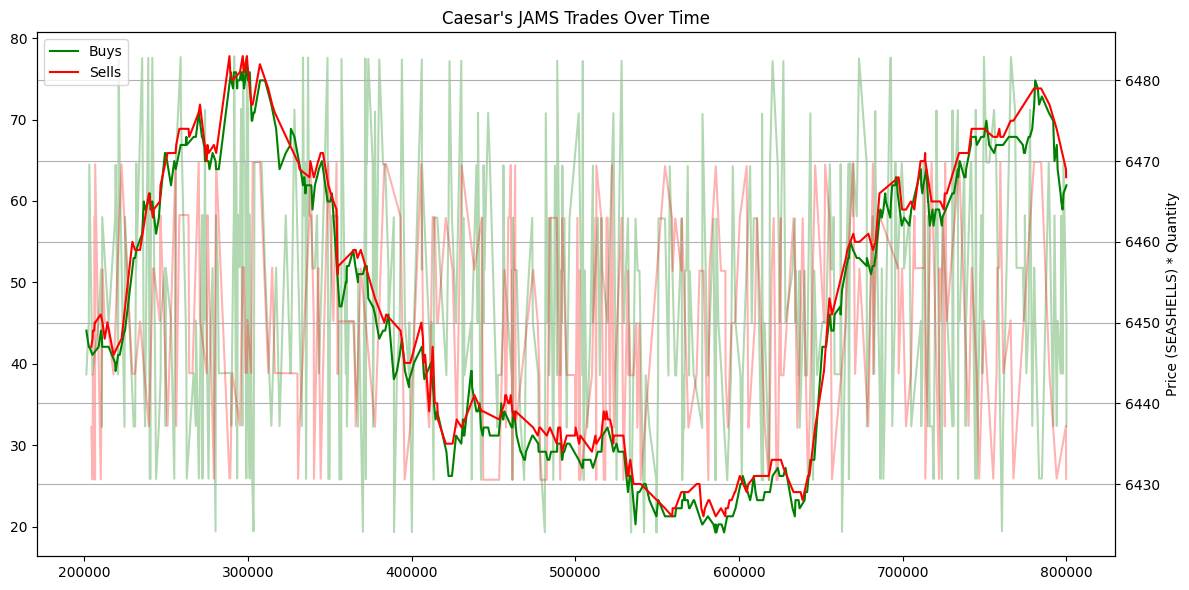

In [17]:
# Lets examine Caesar (JAMS)
df_caesar_buys = df[(df['buyer'] == 'Caesar')]
df_caesar_sells = df[(df['seller'] == 'Caesar')]

df_caesar_buys = df_caesar_buys[(df_caesar_buys['timestamp'] >= 200000) & (df_caesar_buys['timestamp'] <= 800000)]
df_caesar_sells = df_caesar_sells[(df_caesar_sells['timestamp'] >= 200000) & (df_caesar_sells['timestamp'] <= 800000)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Caesar's buys in green
ax1.plot(df_caesar_buys["timestamp"], df_caesar_buys["price"] * df_caesar_buys["quantity"] /1000, 
            color='green', label='Buys', alpha=0.3)

# Plot Caesar's sells in red
ax1.plot(df_caesar_sells["timestamp"], df_caesar_sells["price"] * df_caesar_sells["quantity"] / 1000, 
            color='red', label='Sells', alpha=0.3)

ax2 = ax1.twinx()

# Plot Caesar's buys in green
ax2.plot(df_caesar_buys["timestamp"], df_caesar_buys["price"], 
            color='green', label='Buys', alpha=1)

# Plot Caesar's sells in red
ax2.plot(df_caesar_sells["timestamp"], df_caesar_sells["price"], 
            color='red', label='Sells', alpha=1)

plt.xlabel("Timestamp")
plt.ylabel("Price (SEASHELLS) * Quantity")
plt.title("Caesar's JAMS Trades Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Notes

* Caesar's trades seem to have a constant vwap despite varying prices
* Seems to be generally bullish

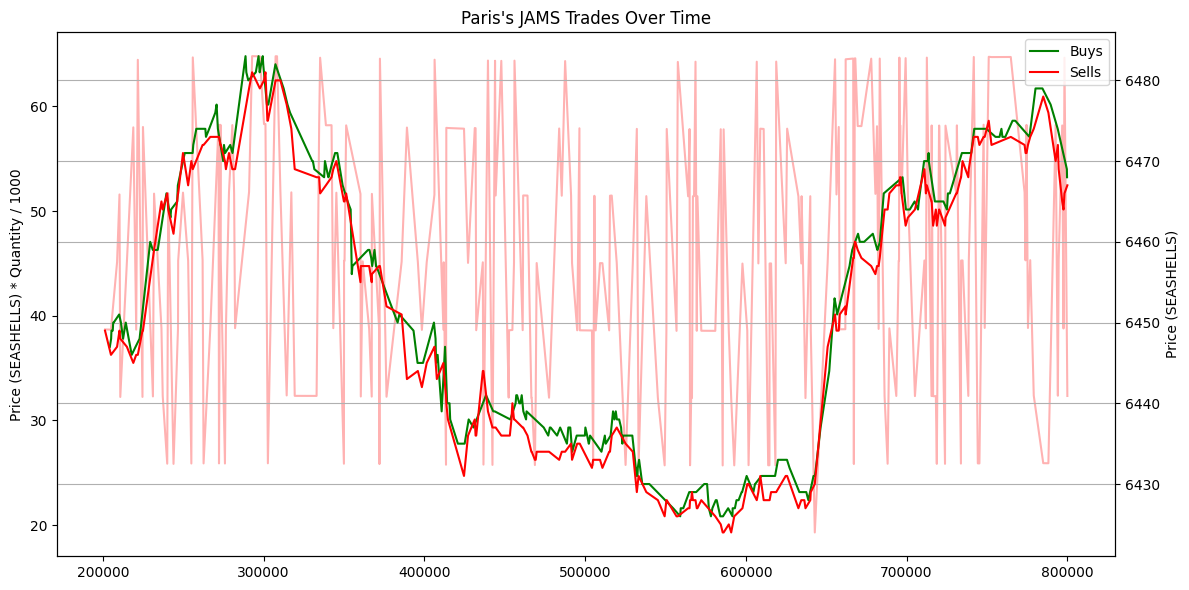

In [19]:
# Lets examine Paris (JAMS)
# df = day_trades[day][day_trades[day]["symbol"] == "JAMS"]

df_buys = df[(df['buyer'] == 'Paris')]
df_sells = df[(df['seller'] == 'Paris')]

# df = day_prices[day][day_prices[day]["symbol"] == "JAMS"]
# df_p = df[(df['seller'] == 'Paris')]

df_buys = df_buys[(df_buys['timestamp'] >= 200000) & (df_buys['timestamp'] <= 800000)]
df_sells = df_sells[(df_sells['timestamp'] >= 200000) & (df_sells['timestamp'] <= 800000)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot paris's sells in red
ax1.plot(df_sells["timestamp"], df_sells["price"] * df_sells["quantity"] / 1000, 
            color='red', label='Sells', alpha=0.3)
ax1.set_ylabel("Price (SEASHELLS) * Quantity / 1000")


ax2 = ax1.twinx()

# Plot paris's buys in green
ax2.plot(df_buys["timestamp"], df_buys["price"], 
            color='green', label='Buys', alpha=1)

# Plot paris's sells in red
ax2.plot(df_sells["timestamp"], df_sells["price"], 
            color='red', label='Sells', alpha=1)
ax2.set_ylabel("Price (SEASHELLS)")

plt.xlabel("Timestamp")
plt.title("Paris's JAMS Trades Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Notes

* Paris's trades seem to be even more consistent when it comes to vwap
* Seems to be market neutral...

In [120]:
df = day_trades[day][day_trades[day]["symbol"] == "PICNIC_BASKET2"]

print("Unique participants in the market")

print("Buyers: ", df["buyer"].unique())
print("Sellers: ", df["seller"].unique())

pd.concat([df["buyer"], df["seller"]]).unique()


Unique participants in the market
Buyers:  ['Penelope' 'Caesar' 'Charlie' 'Camilla' 'Pablo']
Sellers:  ['Charlie' 'Camilla' 'Pablo' 'Penelope' 'Caesar']


array(['Penelope', 'Caesar', 'Charlie', 'Camilla', 'Pablo'], dtype=object)

In [131]:
def calc_pnl(trader: str, product: str, trades: pd.DataFrame, prices: pd.DataFrame):
    
    df_trades = trades[trades["symbol"] == product]
    
    df_trades = df_trades[( (df_trades['seller'] == trader) | (df_trades['buyer'] == trader))]

    df_prices = prices[prices["product"] == product]
    # df_trades = df_trades[( (df_trades['seller'] == trader) | (df_trades['buyer'] == trader))]

    pnl = 0
    position = 0
    last_price = 0
    for timestamp in range (0, 1_000_000, 100):

        curr_price = df_prices[df_prices['timestamp'] == timestamp]['mid_price'].iloc[0]
        
        if position > 0:
            pnl += (curr_price - last_price) * position
        
        if (df_trades['timestamp'].iloc[0] == timestamp ):

            if (df_trades['buyer'].iloc[0] == trader):
                
                if position < 0:
                    pnl += position * curr_price
                
                position += df_trades['quantity'].iloc[0]

            if (df_trades['seller'].iloc[0] == trader):

                if (position - df_trades['quantity'].iloc[0]) < 0:
                    pnl += (df_trades['quantity'].iloc[0] - position) * curr_price
                
                position -= df_trades['quantity'].iloc[0]

        last_price = curr_price

    if position < 0:
        pnl += position * curr_price
    
    return pnl

day = 2


days = [0, 1, 2]
products = ["SQUID_INK", "CROISSANTS", "JAMS", "DJEMBES", "PICNIC_BASKET1", "PICNIC_BASKET2", "MAGNIFICIENT_MACARONS"]



for product in products:
    for day in days:
        df = day_trades[day][day_trades[day]["symbol"] == product]
        for idx in pd.concat([df["buyer"], df["seller"]]).unique():

            pnl = calc_pnl(idx, product, day_trades[day], day_prices[day])

            if pnl > 0:
                print(f"day:{day}, product:{product}, idx: {idx}, pnl: {pnl}")


day:0, product:SQUID_INK, idx: Paris, pnl: 17.0
day:0, product:SQUID_INK, idx: Camilla, pnl: 15.0
day:0, product:SQUID_INK, idx: Penelope, pnl: 68.0
day:0, product:SQUID_INK, idx: Gina, pnl: 51.0
day:0, product:SQUID_INK, idx: Olivia, pnl: 742.5
day:1, product:SQUID_INK, idx: Gina, pnl: 791.0
day:1, product:SQUID_INK, idx: Paris, pnl: 117.0
day:1, product:SQUID_INK, idx: Olivia, pnl: 2557.5
day:2, product:SQUID_INK, idx: Paris, pnl: 40.0
day:2, product:SQUID_INK, idx: Penelope, pnl: 162.0
day:2, product:SQUID_INK, idx: Caesar, pnl: 120.0
day:2, product:SQUID_INK, idx: Camilla, pnl: 38.5
day:2, product:SQUID_INK, idx: Gina, pnl: 750.0
day:2, product:SQUID_INK, idx: Olivia, pnl: 2242.5
day:0, product:CROISSANTS, idx: Paris, pnl: 192.0
day:0, product:CROISSANTS, idx: Olivia, pnl: 111.0
day:0, product:CROISSANTS, idx: Camilla, pnl: 104.0
day:1, product:CROISSANTS, idx: Caesar, pnl: 432.0
day:1, product:CROISSANTS, idx: Olivia, pnl: 207.0
day:2, product:CROISSANTS, idx: Caesar, pnl: 156.0
d

## NOTES

* SQUID_INK
  * Olivia cooks
* PICNIC_BASKET1
  * Camilla??
* PICNIC _BASKET2
  * Penelope?

In [ ]:
# Lets examine Camilla (JAMS)
df_camilla_buys = df[(df['buyer'] == 'Camilla')]
df_camilla_sells = df[(df['seller'] == 'Camilla')]

df_camilla_buys = df_camilla_buys[(df_camilla_buys['timestamp'] >= 000000) & (df_camilla_buys['timestamp'] <= 800000)]
df_camilla_sells = df_camilla_sells[(df_camilla_sells['timestamp'] >= 000000) & (df_camilla_sells['timestamp'] <= 800000)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# # Plot camilla's buys in green
# ax1.plot(df_camilla_buys["timestamp"], df_camilla_buys["price"] * df_camilla_buys["quantity"] /1000, 
#             color='green', label='Buys', alpha=0.3)

# # Plot camilla's sells in red
# ax1.plot(df_camilla_sells["timestamp"], df_camilla_sells["price"] * df_camilla_sells["quantity"] / 1000, 
#             color='red', label='Sells', alpha=0.3)
# ax1.set_ylabel("Price (SEASHELLS) * Quantity")

# Plot camilla's buys in green
ax2.scatter(df_camilla_buys["timestamp"], df_camilla_buys["price"], 
            color='green', label='Buys', alpha=1)


ax2 = ax1.twinx()


# Plot camilla's buys in green
ax2.scatter(df_camilla_buys["timestamp"], df_camilla_buys["price"], 
            color='green', label='Buys', alpha=1)

# Plot camilla's sells in red
ax2.scatter(df_camilla_sells["timestamp"], df_camilla_sells["price"], 
            color='red', label='Sells', alpha=1)
ax2.set_ylabel("Price (SEASHELLS)")

plt.xlabel("Timestamp")
plt.title("Camilla's JAMS Trades Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## P2P Analysis



(0.0, 1000000.0)

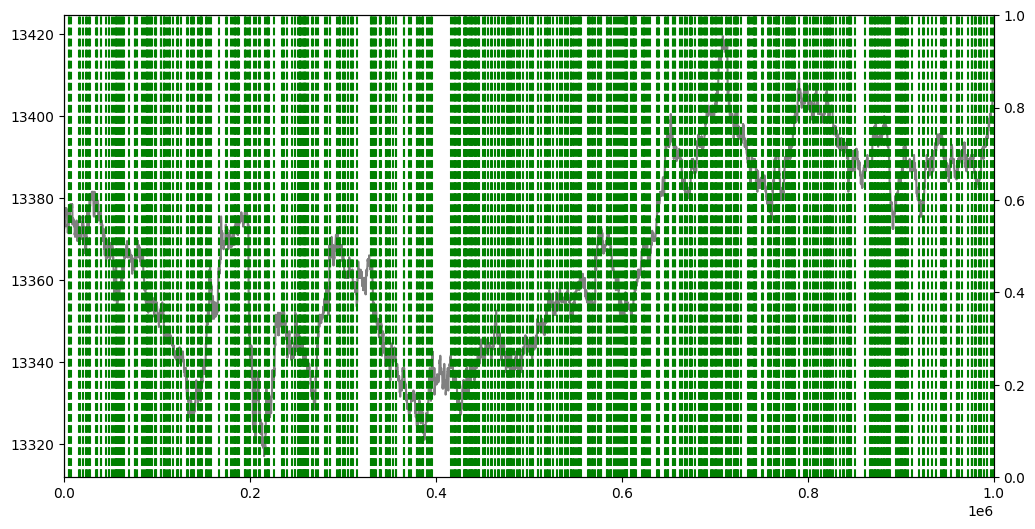

In [100]:
day = 2
df = day_prices[day][day_prices[day]["product"] == "DJEMBES"]

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df["timestamp"], df["mid_price"], 
            color='grey', label='Buys', alpha=1)

ax2 = ax1.twinx()

# df = day_trades[day][day_trades[day]["symbol"] == "PICNIC_BASKET1"]
# df = df[(df['buyer'] == 'Camilla') & (df['seller'] == 'Pablo')]

# for _, row in df.iterrows():
#     ax2.axvline(x=row['timestamp'], color='red', linestyle='--', linewidth=1.5)


df = day_trades[day][day_trades[day]["symbol"] == "DJEMBES"]
df = df[(df['seller'] == 'Paris')]# & (df['buyer'] == 'Penelope')]

for _, row in df.iterrows():
    ax2.axvline(x=row['timestamp'], color='green', linestyle='--', linewidth=1.5)


# Get first trade timestamp
zoom_start = 0000
zoom_end = 1_000_000
ax1.set_xlim(zoom_start, zoom_end)



# df = df[(df['buyer'] == 'Caesar')]

# ax2.plot(df["timestamp"], df["price"], 
#             color='green', label='Buys', alpha=1)

# df = df[(df['seller'] == 'Camilla')]

# ax2.plot(df["timestamp"], df["price"], 
#             color='red', label='Sells', alpha=1)
